In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 15, 10

In [42]:
df1 = pd.read_excel('subject_data.xlsx', sheet_name='subjects')
df1.head()

,region,born_2020,born_2019,born_2018,born_2017,born_2016,born_2015,died_2020,died_2019,died_2018,died_2017,died_2016,died_2015,nr_2020,nr_2019,nr_2018,nr_2017,nr_2016,nr_2015,place
0,Белгородская область,8.0,8.5,9.2,9.7,11.1,11.5,15.6,13.3,13.5,13.5,13.9,13.9,-7.6,-4.8,-4.3,-3.8,-2.8,-2.4,ЦФО
1,Брянская область,8.0,8.3,9.2,9.5,10.9,11.4,17.0,14.7,15.2,15.3,15.6,15.8,-9.0,-6.4,-6.0,-5.8,-4.7,-4.4,ЦФО
2,Владимирская область,7.5,8.1,9.3,9.7,11.2,11.6,18.3,15.6,16.0,15.7,16.5,16.5,-10.8,-7.5,-6.7,-6.0,-5.3,-4.9,ЦФО
3,Воронежская область,8.2,8.4,9.2,9.6,10.7,11.1,16.5,14.1,14.7,14.6,15.2,15.3,-8.3,-5.7,-5.5,-5.0,-4.5,-4.2,ЦФО
4,Ивановская область,7.6,7.9,9.0,9.7,10.9,11.4,17.7,15.8,16.1,15.9,16.1,16.0,-10.1,-7.9,-7.1,-6.2,-5.2,-4.6,ЦФО


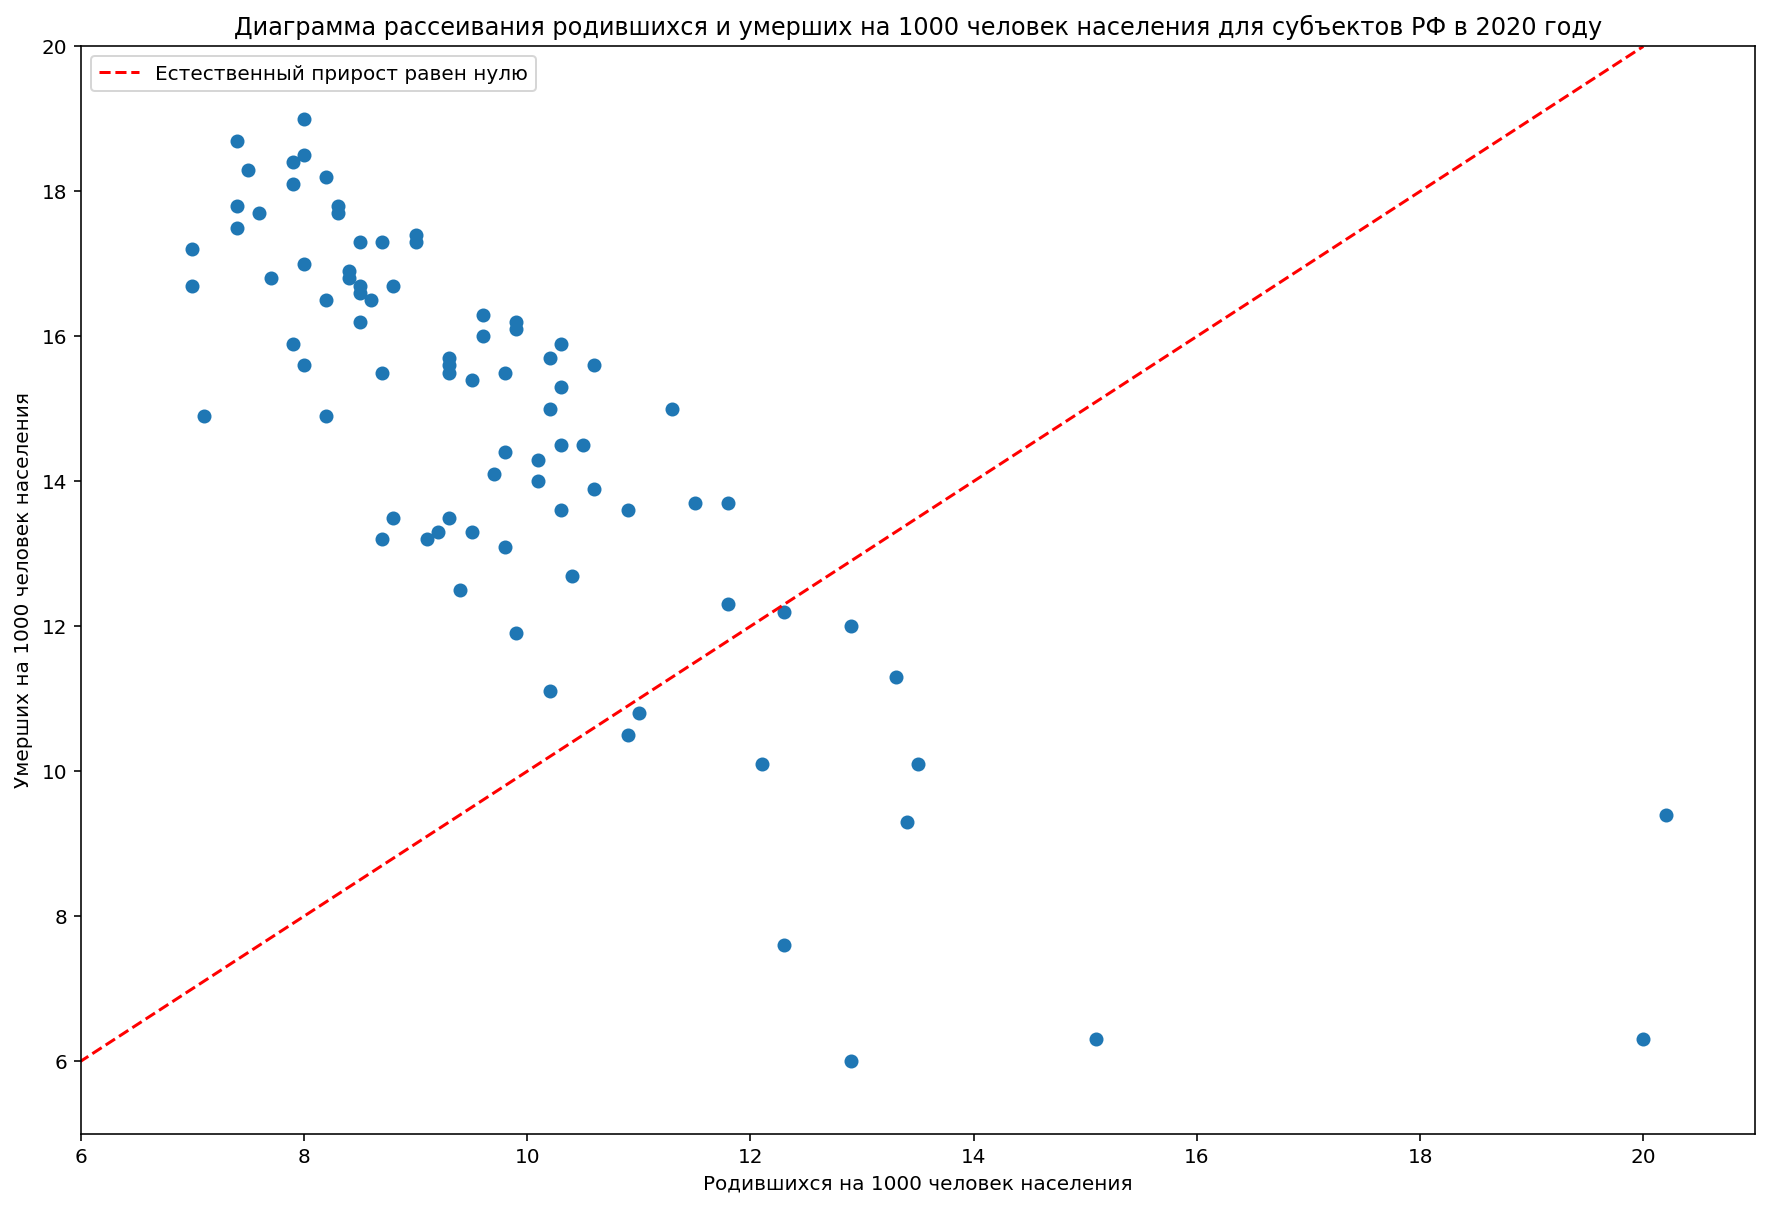

In [3]:
plt.title('Диаграмма рассеивания родившихся и умерших на 1000 человек населения для субъектов РФ в 2020 году')

plt.plot(np.linspace(0, 20, 200), np.linspace(0, 20, 200), c='red', linestyle='--', 
         label='Естественный прирост равен нулю')
plt.scatter(df1['born_2020'], df1['died_2020'])

plt.xlim((6, 21))
plt.ylim((5, 20))
plt.xlabel('Родившихся на 1000 человек населения')
plt.ylabel('Умерших на 1000 человек населения')
plt.legend();

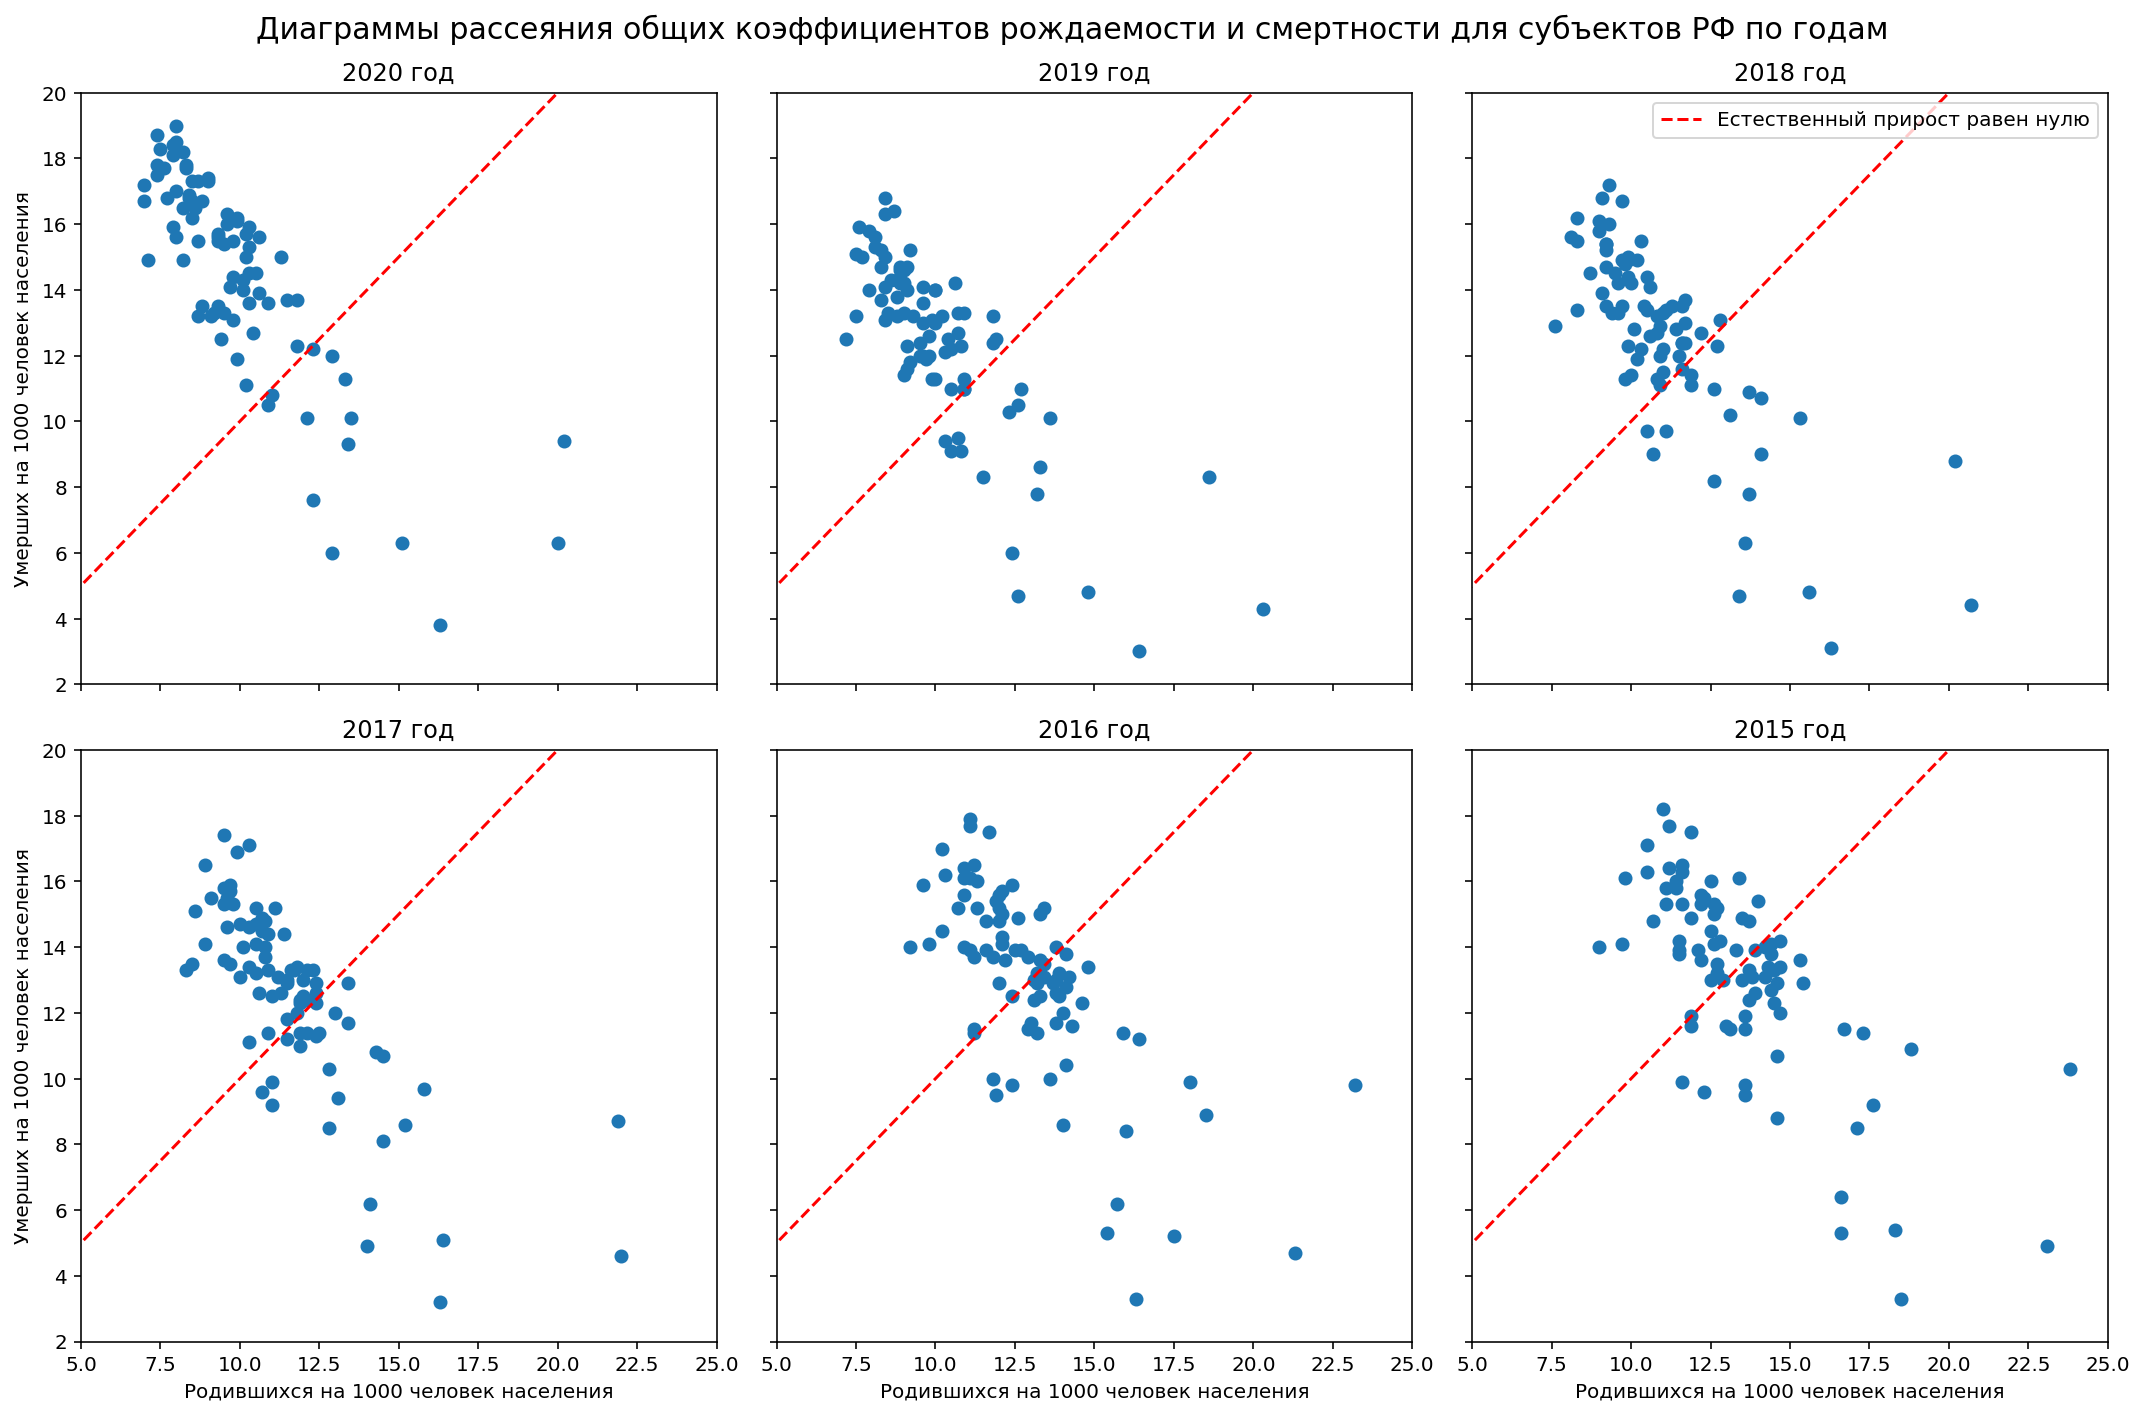

In [38]:
fig, axs = plt.subplots(2, 3, sharex='all', sharey='all')

for i in range(6):
    axs[i // 3, i % 3].set_title(f'20{20-i} год')
    axs[i // 3, i % 3].plot(np.linspace(3, 25, 200), np.linspace(3, 25, 200), c='red', linestyle='--', 
         label='Естественный прирост равен нулю')
    axs[i // 3, i % 3].scatter(df1[f'born_20{20-i}'], df1[f'died_20{20-i}'])
    axs[i // 3, i % 3].set_xlim((5, 25))
    axs[i // 3, i % 3].set_ylim((2, 20))
plt.suptitle('Диаграммы рассеяния общих коэффициентов рождаемости и смертности для субъектов РФ по годам', fontsize=15)   
axs[0, 0].set_ylabel('Умерших на 1000 человек населения')
axs[1, 0].set_ylabel('Умерших на 1000 человек населения')
axs[1, 0].set_xlabel('Родившихся на 1000 человек населения')
axs[1, 1].set_xlabel('Родившихся на 1000 человек населения')
axs[1, 2].set_xlabel('Родившихся на 1000 человек населения')
axs[0, 2].legend(loc='upper right')
fig.tight_layout()
plt.savefig('scatter.pdf' ,dpi=200);

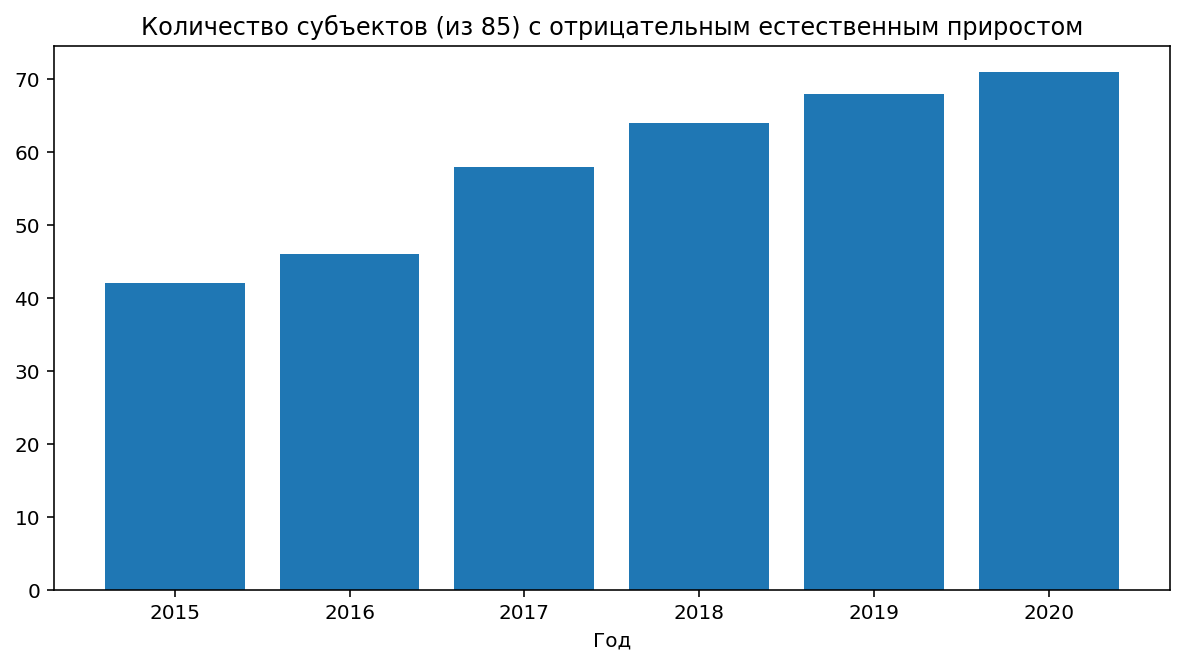

In [5]:
ratios_nr = []
plt.figure(figsize=(10, 5))

for i in range(6):
    ratios_nr.append((df1[f'nr_20{15+i}'] < 0).sum())

plt.title('Количество субъектов (из 85) с отрицательным естественным приростом')
plt.bar(np.arange(2015, 2021), ratios_nr, )
plt.xlabel('Год')
plt.savefig('num_subj.pdf' ,dpi=200);

In [6]:
print('Кол-во субъектов с естественной убылью населения по годам:', *ratios_nr)

Кол-во субъектов с естественной убылью населения по годам: 42 46 58 64 68 71


In [7]:
df2 = pd.read_excel('subject_data.xlsx', sheet_name='regions')
df2.head()

,region,born_2020,born_2019,born_2018,born_2017,born_2016,born_2015,died_2020,died_2019,died_2018,died_2017,died_2016,died_2015,nr_2020,nr_2019,nr_2018,nr_2017,nr_2016,nr_2015
0,РФ,9.8,10.1,10.9,11.5,12.9,13.3,14.6,12.3,12.5,12.4,12.9,13.0,-4.8,-2.2,-1.6,-0.9,-0.01,0.3
1,ЦФО,9.0,9.3,9.9,10.4,11.6,11.7,15.1,12.6,12.9,12.9,13.5,13.5,-6.1,-3.3,-3.0,-2.5,-1.90,-1.8
2,СЗФО,9.1,9.6,10.4,11.1,12.4,12.5,14.6,12.4,12.6,12.8,13.2,13.4,-5.5,-2.8,-2.2,-1.7,-0.80,-0.9
3,ЮФО,9.5,9.8,10.5,11.1,12.3,12.8,15.0,12.8,12.8,12.9,13.5,13.6,-5.5,-3.0,-2.3,-1.8,-1.20,-1.2
4,СКФО,13.7,13.7,14.4,15.0,15.9,16.6,9.0,7.4,7.5,7.5,7.8,7.9,4.7,6.3,6.9,7.5,8.10,8.7


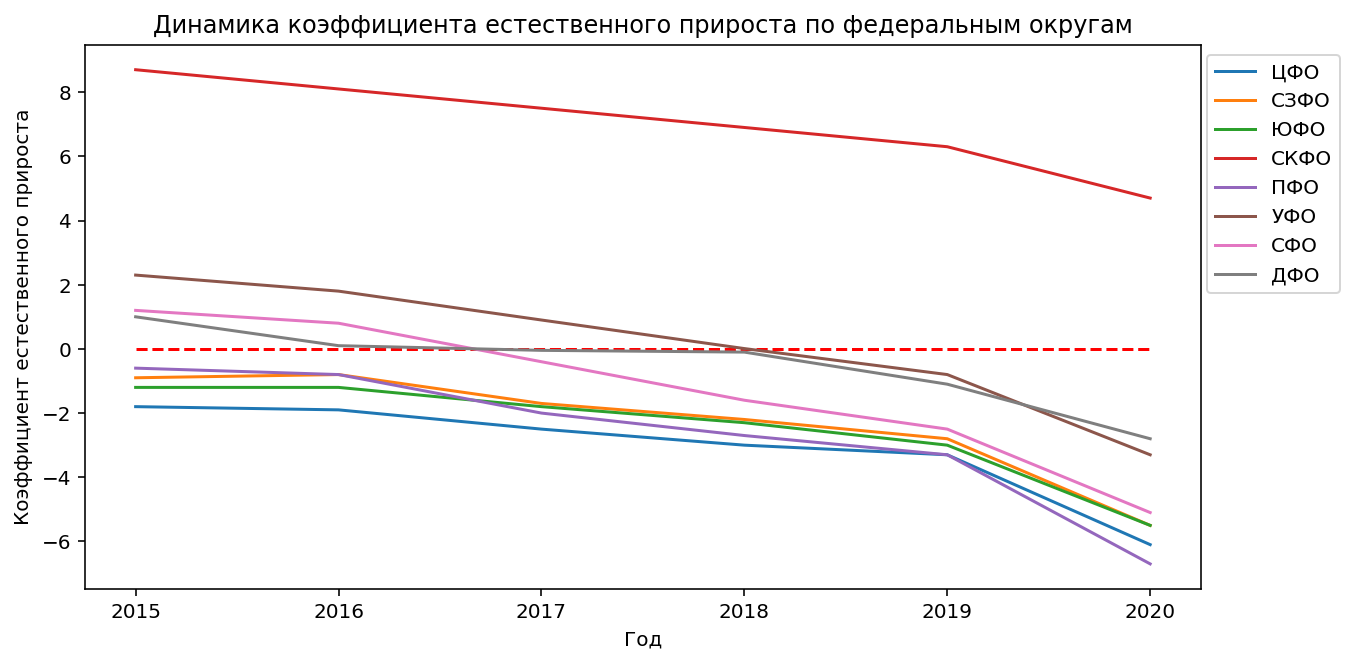

In [118]:
plt.figure(figsize=(10, 5))

plt.hlines(0, 2015, 2020, color='red', linestyle='--')

for i in range(1, len(df2)):
    rise = df2[['nr_2015', 'nr_2016', 'nr_2017', 'nr_2018', 'nr_2019', 'nr_2020']]
    plt.plot(range(2015, 2021), rise.loc[i], label=df2.region.loc[i])


plt.title('Динамика коэффициента естественного прироста по федеральным округам')
plt.xlabel('Год')
plt.ylabel('Коэффициент естественного прироста')
plt.legend(bbox_to_anchor=(1.134, 1.0))
plt.savefig('dynamics_nr.pdf' ,dpi=200);

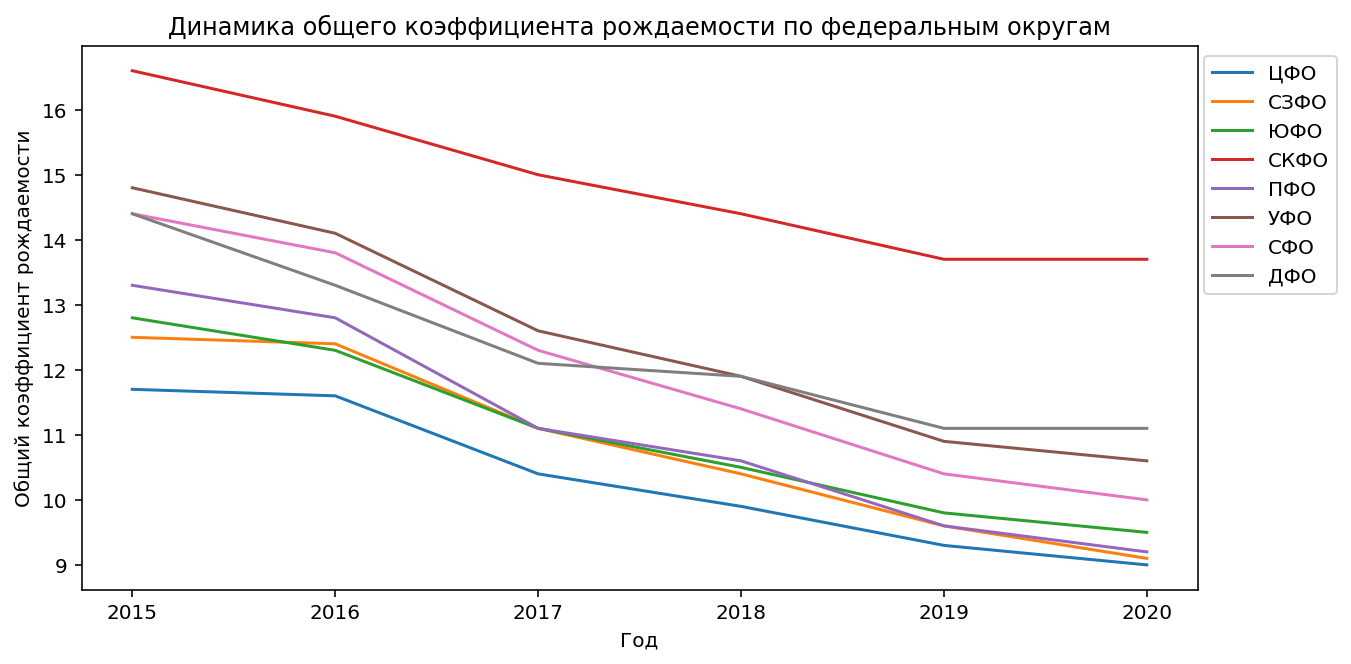

In [36]:
plt.figure(figsize=(10, 5))

for i in range(1, len(df2)):
    rise = df2[['born_2015', 'born_2016', 'born_2017', 'born_2018', 'born_2019', 'born_2020']]
    plt.plot(range(2015, 2021), rise.loc[i], label=df2.region.loc[i])

plt.title('Динамика общего коэффициента рождаемости по федеральным округам')
plt.xlabel('Год')
plt.ylabel('Общий коэффициент рождаемости')
plt.legend(bbox_to_anchor=(1.134, 1.0))
plt.savefig('dynamics_born.pdf' ,dpi=200);

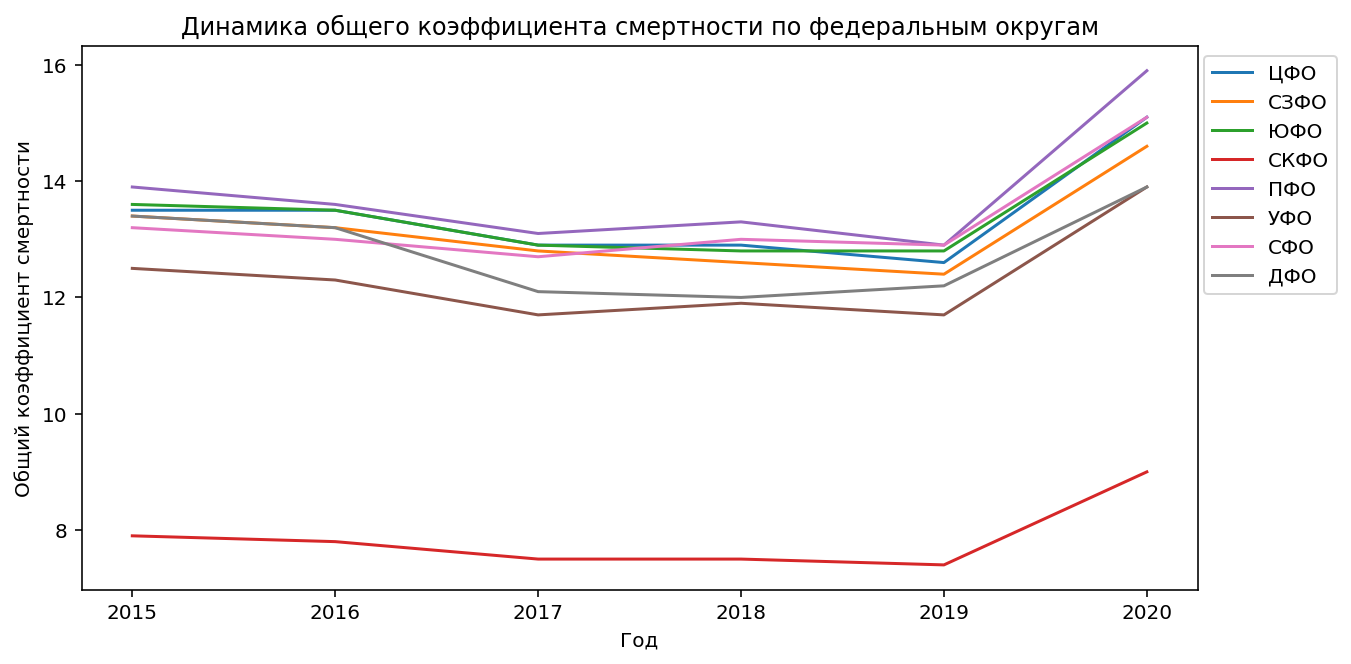

In [37]:
plt.figure(figsize=(10, 5))

for i in range(1, len(df2)):
    rise = df2[['died_2015', 'died_2016', 'died_2017', 'died_2018', 'died_2019', 'died_2020']]
    plt.plot(range(2015, 2021), rise.loc[i], label=df2.region.loc[i])


plt.title('Динамика общего коэффициента смертности по федеральным округам')
plt.xlabel('Год')
plt.ylabel('Общий коэффициент смертности')
plt.legend(bbox_to_anchor=(1.134, 1.0))
plt.savefig('dynamics_died.pdf' ,dpi=200);

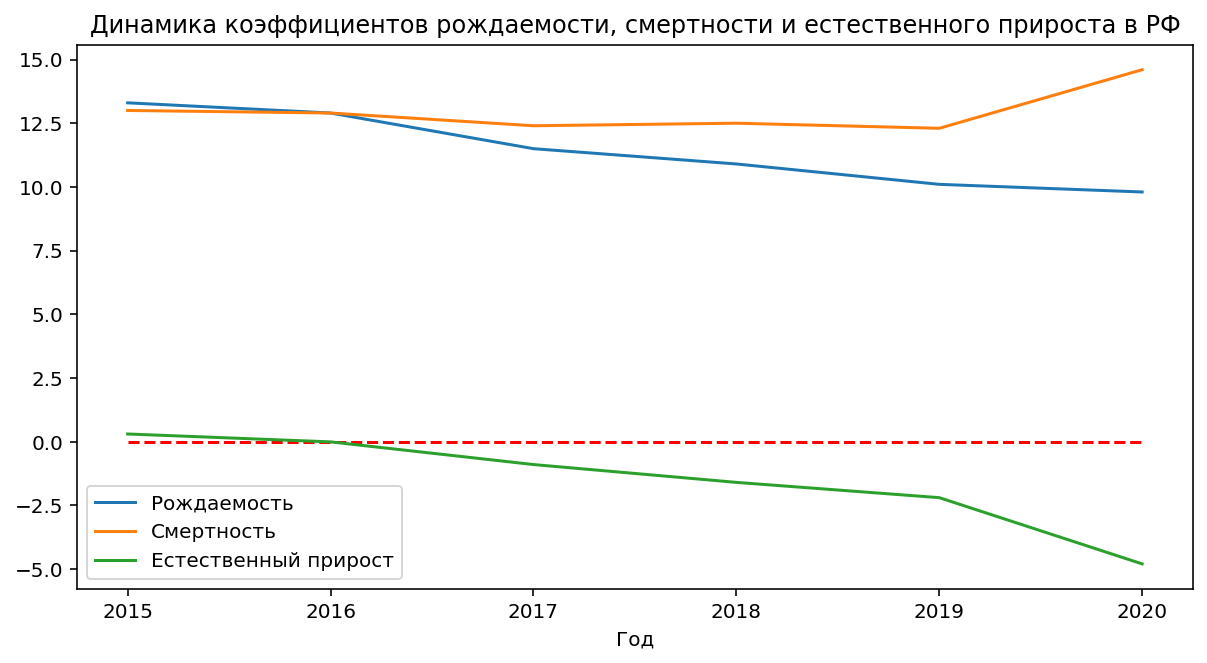

In [11]:
plt.figure(figsize=(10, 5))

born = df2[['born_2015', 'born_2016', 'born_2017', 'born_2018', 'born_2019', 'born_2020']]
died = df2[['died_2015', 'died_2016', 'died_2017', 'died_2018', 'died_2019', 'died_2020']]
nr = df2[['nr_2015', 'nr_2016', 'nr_2017', 'nr_2018', 'nr_2019', 'nr_2020']]

plt.hlines(0, 2015, 2020, color='red', linestyle='--')
plt.plot(range(2015, 2021), born.loc[0], label='Рождаемость')
plt.plot(range(2015, 2021), died.loc[0], label='Смертность')
plt.plot(range(2015, 2021), nr.loc[0], label='Естественный прирост')

plt.title('Динамика коэффициентов рождаемости, смертности и естественного прироста в РФ')
plt.xlabel('Год')
plt.legend()
plt.savefig('dynamics_RF.pdf', dpi=200);

In [94]:
best5_r = []
worst5_r = []

for i in range(6):
    worst5_r.append(list(df1.sort_values(by=f'nr_20{15+i}', ascending=0).tail(5).region.values))
    best5_r.append(list(df1.sort_values(by=f'nr_20{15+i}', ascending=0).head(5).region.values))

In [95]:
pd.DataFrame(best5_r)

,0,1,2,3,4
0,Чеченская Республика,Республика Ингушетия,Республика Хакасия,Республика Дагестан,Ямало-Ненецкий автономный округ
1,Чеченская Республика,Республика Хакасия,Республика Ингушетия,Республика Дагестан,Ямало-Ненецкий автономный округ
2,Чеченская Республика,Республика Тыва,Республика Ингушетия,Республика Дагестан,Ямало-Ненецкий автономный округ
3,Чеченская Республика,Республика Ингушетия,Республика Тыва,Республика Дагестан,Ямало-Ненецкий автономный округ
4,Чеченская Республика,Республика Ингушетия,Республика Тыва,Республика Дагестан,Ямало-Ненецкий автономный округ
5,Чеченская Республика,Республика Ингушетия,Республика Тыва,Республика Дагестан,Ямало-Ненецкий автономный округ


In [96]:
dfbest = pd.DataFrame(best5_r).T
dfbest.rename(columns={0:2015, 1:2016, 2:2017, 3:2018, 4:2019, 5:2020}, inplace=True)
dfbest.to_excel('best_subj.xlsx')

In [99]:
dfworst = pd.DataFrame(worst5_r).T
dfworst.rename(columns={0:2015, 1:2016, 2:2017, 3:2018, 4:2019, 5:2020}, inplace=True)
dfworst.to_excel('worst_subj.xlsx')

In [77]:
df2.loc[4][1:7]

born_2020    13.7
born_2019    13.7
born_2018    14.4
born_2017    15.0
born_2016    15.9
born_2015    16.6
Name: 4, dtype: object

Превышение коэффициента рождаемости в СКФО над коэффициентом по РФ с реднем по годам:

In [116]:
df2.loc[0][7:13]

died_2020    14.6
died_2019    12.3
died_2018    12.5
died_2017    12.4
died_2016    12.9
died_2015    13.0
Name: 0, dtype: object

In [100]:
(df2.loc[4][1:7] - df2.loc[0][1:7]).mean()

3.466666666666667

In [105]:
(df1['nr_2015'] <0).sum()

42

In [106]:
(df1['nr_2020'] <0).sum()

71

In [107]:
71/42

1.6904761904761905

In [111]:
df2

,region,born_2020,born_2019,born_2018,born_2017,born_2016,born_2015,died_2020,died_2019,died_2018,died_2017,died_2016,died_2015,nr_2020,nr_2019,nr_2018,nr_2017,nr_2016,nr_2015
0,РФ,9.8,10.1,10.9,11.5,12.9,13.3,14.6,12.3,12.5,12.4,12.9,13.0,-4.8,-2.2,-1.60,-0.9000,-0.01,0.3
1,ЦФО,9.0,9.3,9.9,10.4,11.6,11.7,15.1,12.6,12.9,12.9,13.5,13.5,-6.1,-3.3,-3.00,-2.5000,-1.90,-1.8
2,СЗФО,9.1,9.6,10.4,11.1,12.4,12.5,14.6,12.4,12.6,12.8,13.2,13.4,-5.5,-2.8,-2.20,-1.7000,-0.80,-0.9
3,ЮФО,9.5,9.8,10.5,11.1,12.3,12.8,15.0,12.8,12.8,12.9,13.5,13.6,-5.5,-3.0,-2.30,-1.8000,-1.20,-1.2
4,СКФО,13.7,13.7,14.4,15.0,15.9,16.6,9.0,7.4,7.5,7.5,7.8,7.9,4.7,6.3,6.90,7.5000,8.10,8.7
5,ПФО,9.2,9.6,10.6,11.1,12.8,13.3,15.9,12.9,13.3,13.1,13.6,13.9,-6.7,-3.3,-2.70,-2.0000,-0.80,-0.6
6,УФО,10.6,10.9,11.9,12.6,14.1,14.8,13.9,11.7,11.9,11.7,12.3,12.5,-3.3,-0.8,0.01,0.9000,1.80,2.3
7,СФО,10.0,10.4,11.4,12.3,13.8,14.4,15.1,12.9,13.0,12.7,13.0,13.2,-5.1,-2.5,-1.60,-0.4000,0.80,1.2
8,ДФО,11.1,11.1,11.9,12.1,13.3,14.4,13.9,12.2,12.0,12.1,13.2,13.4,-2.8,-1.1,-0.10,-0.0455,0.10,1.0


In [117]:
(df2.loc[4][7:13] - df2.loc[0][7:13]).mean()

-5.1000000000000005

In [122]:
df1[50:]

,region,born_2020,born_2019,born_2018,born_2017,born_2016,born_2015,died_2020,died_2019,died_2018,died_2017,died_2016,died_2015,nr_2020,nr_2019,nr_2018,nr_2017,nr_2016,nr_2015,place
50,Пермский край,9.8,10.2,11.3,12.1,14.1,14.7,15.5,13.2,13.5,13.3,13.8,14.2,-5.7,-3.0,-2.2,-1.2,0.3,0.5,ПФО
51,Кировская область,8.4,8.8,9.9,10.7,12.6,12.7,16.8,14.3,14.9,14.5,14.9,15.2,-8.4,-5.5,-5.0,-3.8,-2.3,-2.5,ПФО
52,Нижегородская область,8.7,9.0,9.9,10.5,11.9,12.3,17.3,14.6,15.0,14.7,15.4,15.5,-8.6,-5.6,-5.1,-4.2,-3.5,-3.2,ПФО
53,Оренбургская область,9.6,10.0,11.0,11.6,13.4,14.2,16.3,13.0,13.3,13.3,13.5,14.0,-6.7,-3.0,-2.3,-1.7,-0.1,0.2,ПФО
54,Пензенская область,7.4,7.9,8.7,8.9,10.2,10.7,17.5,14.0,14.5,14.1,14.5,14.8,-10.1,-6.1,-5.8,-5.2,-4.3,-4.1,ПФО
55,Самарская область,8.8,9.3,10.4,10.8,12.5,12.8,16.7,13.2,13.5,13.7,13.9,14.2,-7.9,-3.9,-3.1,-2.9,-1.4,-1.4,ПФО
56,Саратовская область,7.7,8.3,9.1,9.5,10.9,11.5,16.8,13.7,13.9,13.6,14.0,14.2,-9.1,-5.4,-4.8,-4.1,-3.1,-2.7,ПФО
57,Ульяновская область,8.4,8.8,9.6,10.1,11.6,11.9,16.9,13.8,14.2,14.0,14.8,14.9,-8.5,-5.0,-4.6,-3.9,-3.2,-3.0,ПФО
58,Курганская область,9.0,9.2,10.3,11.1,12.4,13.4,17.4,15.2,15.5,15.2,15.9,16.1,-8.4,-6.0,-5.2,-4.1,-3.5,-2.7,УФО
59,Свердловская область,10.2,10.7,11.6,12.3,13.8,14.4,15.7,13.3,13.5,13.3,14.0,14.1,-5.5,-2.6,-1.9,-1.0,-0.2,0.3,УФО


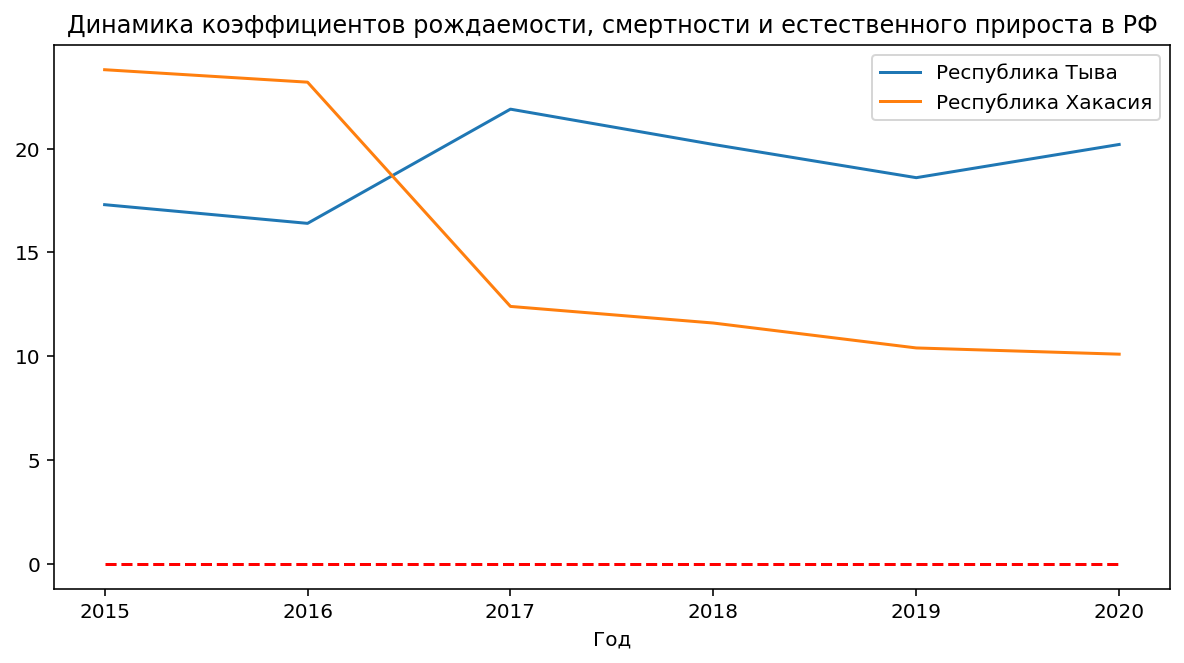

In [125]:
plt.figure(figsize=(10, 5))

born = df1[['born_2015', 'born_2016', 'born_2017', 'born_2018', 'born_2019', 'born_2020']]
died = df1[['died_2015', 'died_2016', 'died_2017', 'died_2018', 'died_2019', 'died_2020']]
nr = df1[['nr_2015', 'nr_2016', 'nr_2017', 'nr_2018', 'nr_2019', 'nr_2020']]

#plt.hlines(0, 2015, 2020, color='red', linestyle='--')
plt.plot(range(2015, 2021), born.loc[65], label='Республика Тыва')
plt.plot(range(2015, 2021), born.loc[66], label='Республика Хакасия')
#plt.plot(range(2015, 2021), nr.loc[0], label='Естественный прирост')

plt.title('Динамика коэффициентов рождаемости')
plt.xlabel('Год')
plt.legend()

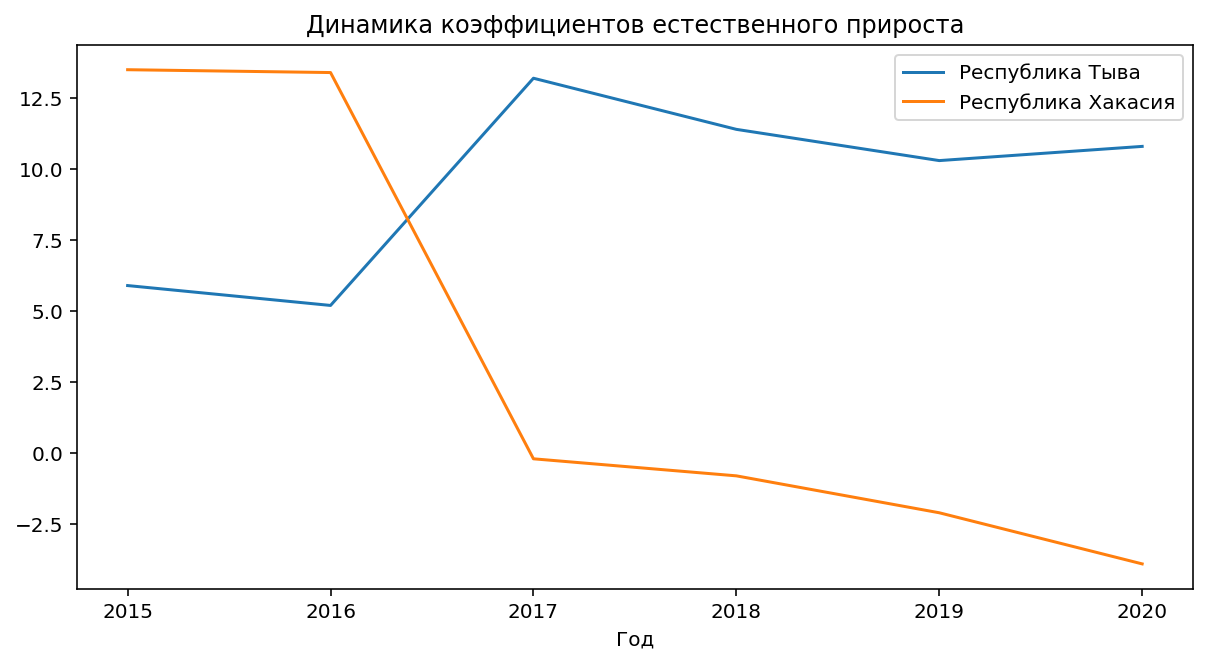

In [127]:
plt.figure(figsize=(10, 5))

born = df1[['born_2015', 'born_2016', 'born_2017', 'born_2018', 'born_2019', 'born_2020']]
died = df1[['died_2015', 'died_2016', 'died_2017', 'died_2018', 'died_2019', 'died_2020']]
nr = df1[['nr_2015', 'nr_2016', 'nr_2017', 'nr_2018', 'nr_2019', 'nr_2020']]

#plt.hlines(0, 2015, 2020, color='red', linestyle='--')
plt.plot(range(2015, 2021), nr.loc[65], label='Республика Тыва')
plt.plot(range(2015, 2021), nr.loc[66], label='Республика Хакасия')
#plt.plot(range(2015, 2021), nr.loc[0], label='Естественный прирост')

plt.title('Динамика коэффициентов естественного прироста')
plt.xlabel('Год')
plt.legend();